# **Lab10: MNIST Image Classification using Deep Neural Network**

In [0]:
# Import statements
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics

## **Custom Data Loading**

In [0]:
# Load Train and Test data
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## **Data Visualization**

In [0]:
def visualize(images, labels):
  rows = 2
  columns = 5
  fig=plt.figure(figsize=(10, 6))
  for index in range(10):
    fig.add_subplot(rows, columns, index + 1, xticks=[], yticks=[])
    plt.title("Label %i" % labels[index])
    plt.imshow(images[index], cmap="gray")

  plt.show()

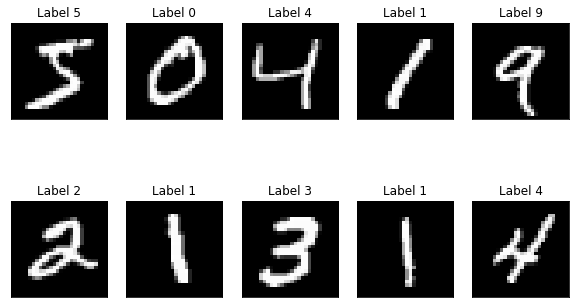

In [0]:
# Visualize Training Data
visualize(X_train, Y_train)

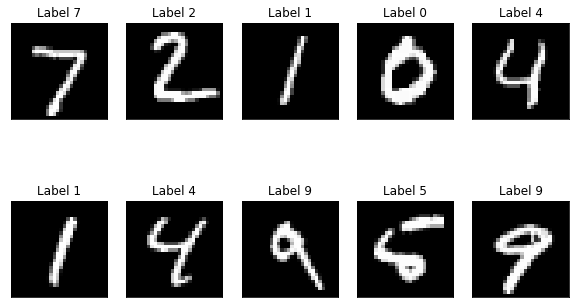

In [0]:
# Visualize Testing Data
visualize(X_test, Y_test)

In [0]:
# Reshaping Images and Labels array
from keras.utils import to_categorical

X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

## **Define Model**

In [0]:
# Define Model Layers
input_im = keras.layers.Input(shape=(28 * 28,), name="input_image")
dense_1 = keras.layers.Dense(512, activation="relu", name="dense_1")(input_im)
dense_2 = keras.layers.Dense(256, activation="relu", name="dense_2")(dense_1)
output = keras.layers.Dense(10, activation="softmax", name="output")(dense_2)

# Define Model Inputs and Output
model = keras.models.Model(input_im,output)
# Compile Model
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
# Model Summary
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_image (InputLayer)     [(None, 784)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


## **Training**

In [0]:
history = model.fit(X_train, Y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 10ms/step - loss: 0.2306 - accuracy: 0.9322
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0823 - accuracy: 0.9749
Epoch 3/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0519 - accuracy: 0.9841
Epoch 4/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0362 - accuracy: 0.9886
Epoch 5/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0261 - accuracy: 0.9915


## **Training and Testing Accuracy**

In [0]:
_, train_acc = model.evaluate(X_train, Y_train)
_, test_acc = model.evaluate(X_test, Y_test)

print('Training Accuray: ', train_acc * 100)
print('Testing Accuray: ', test_acc * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.0670 - accuracy: 0.9799
Training Accuray:  99.29666519165039
Testing Accuray:  97.99000024795532


## **Evaluation Metrics Report**

In [0]:
# Evaluate
pred_cat = model.predict(X_test)
predicted = [np.argmax(i) for i in pred_cat]
predicted = np.array(predicted)
actual = [np.argmax(i) for i in Y_test]
actual = np.array(actual)

# Metrics Report
report = metrics.classification_report(y_pred=predicted, y_true=actual)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       1.00      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## **Accuracy Curve**

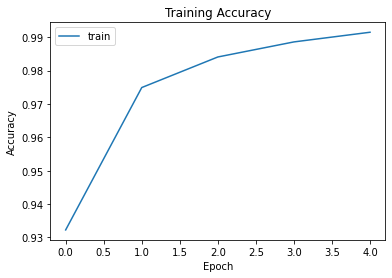

In [0]:
# Plotting Training Accuracy
plt.plot(history.history['accuracy'])  
plt.title('Training Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train']) 
plt.show()

## **Loss Curve**

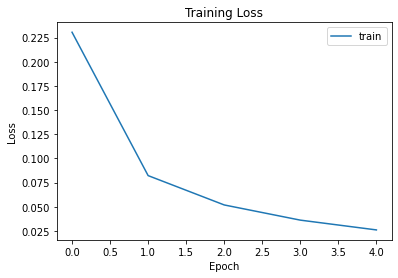

In [0]:
# Plotting Training Loss
plt.plot(history.history['loss'])  
plt.title('Training Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train']) 
plt.show()

## **Confusion Matrix**

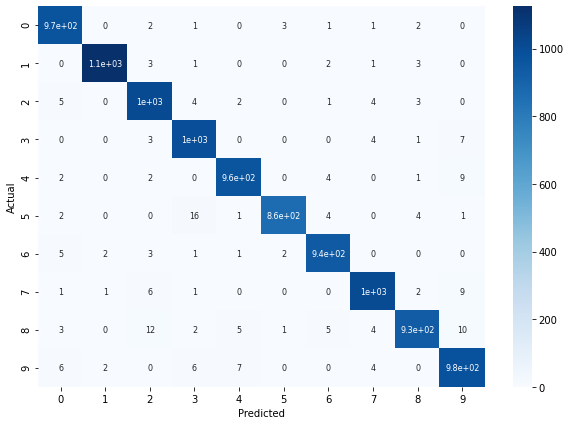

In [0]:
# Confusion Matrix
cm = metrics.confusion_matrix(actual, predicted)

df_cm = pd.DataFrame(cm, columns=np.unique(actual), index = np.unique(predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 8})

## **Testing**

In [0]:
def inference(images):
  rows = 2
  columns = 5
  fig=plt.figure(figsize=(10, 6))
  for index in range(10):
    fig.add_subplot(rows, columns, index+1, xticks=[], yticks=[])
    image = images[index].reshape(1, 28 * 28)
    label = model.predict(image)
    image = image.reshape(28, 28)
    plt.title("Label " + str(np.argmax(label)))
    plt.imshow(image, cmap="gray")
  plt.show()

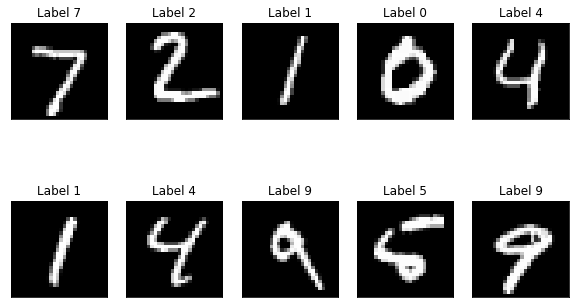

In [0]:
inference(X_test)